<a href="https://colab.research.google.com/github/ajit-ai/DataScience/blob/main/QisKit_BaseCircuit.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
!pip install qiskit
!pip install qiskit qiskit-aer
!pip install qiskit-aer-gpu
!pip install qiskit-aer-gpu-cu11
!pip install --upgrade
!pip install qiskit-aer

# Create and activate a new virtual environment (recommended)
# For Linux/macOS:
!python3 -m venv .venv
!source .venv/bin/activate

# Install Qiskit and Aer within the virtual environment
!pip install qiskit[visualization] qiskit-aer

# You can also upgrade the versions if desired.
# The visualization extra is included to install matplotlib and other dependencies for plotting




ERROR: You must give at least one requirement to install (see "pip help install")
Error: Command '['/content/.venv/bin/python3', '-m', 'ensurepip', '--upgrade', '--default-pip']' returned non-zero exit status 1.
/bin/bash: line 1: .venv/bin/activate: No such file or directory


In [16]:
import qiskit
qiskit.__version__

#{'qiskit-terra': '0.16.0',
# 'qiskit-aer': '0.7.0',
# 'qiskit-ignis': '0.5.0',
# 'qiskit-ibmq-provider': '0.11.0',
# 'qiskit-aqua': '0.8.0',
# 'qiskit': '0.23.0'}

'1.3.2'

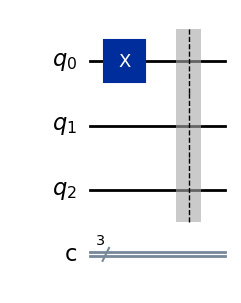

In [17]:
!pip install pylatexenc
from qiskit import *
circuit = QuantumCircuit(3, 3)
circuit.x(0)
circuit.barrier()
%matplotlib inline
circuit.draw(output='mpl')

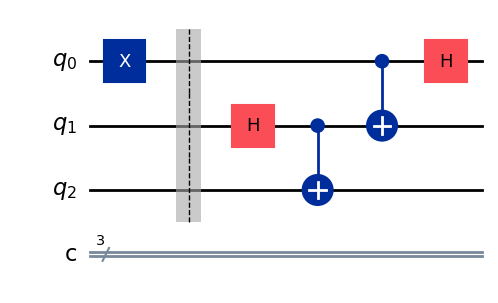

In [18]:
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

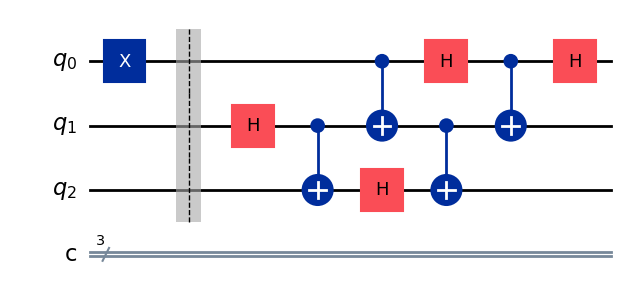

In [19]:
circuit.h(2)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

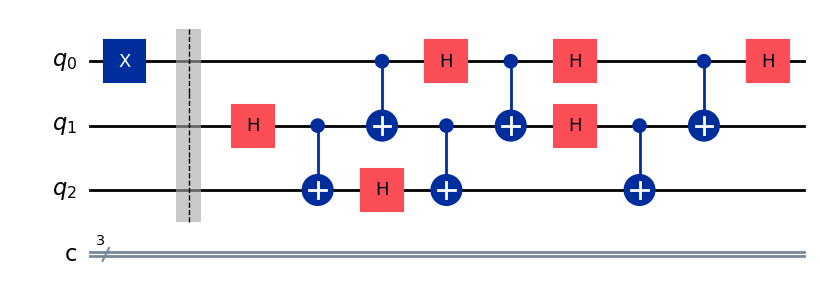

In [20]:
circuit.h(1)
circuit.cx(1,2)
circuit.cx(0,1)
circuit.h(0)
circuit.draw(output='mpl')

In [21]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

In [22]:
circuit.barrier()
circuit.measure([0,1],[0,1])
circuit.draw(output='mpl')
circuit.barrier()

CircuitInstruction(operation=Instruction(name='barrier', num_qubits=3, num_clbits=0, params=[]), qubits=(Qubit(QuantumRegister(3, 'q'), 0), Qubit(QuantumRegister(3, 'q'), 1), Qubit(QuantumRegister(3, 'q'), 2)), clbits=())

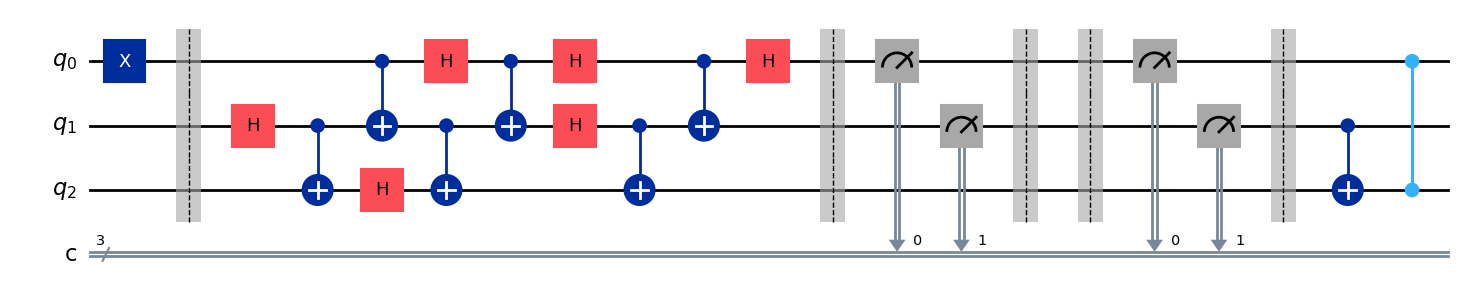

In [23]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

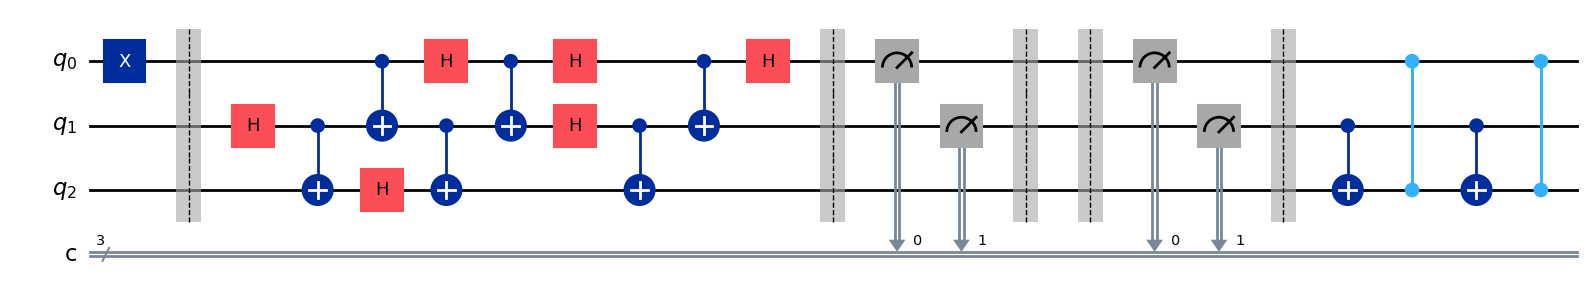

In [24]:
circuit.cx(1,2)
circuit.cz(0,2)
circuit.draw(output='mpl')

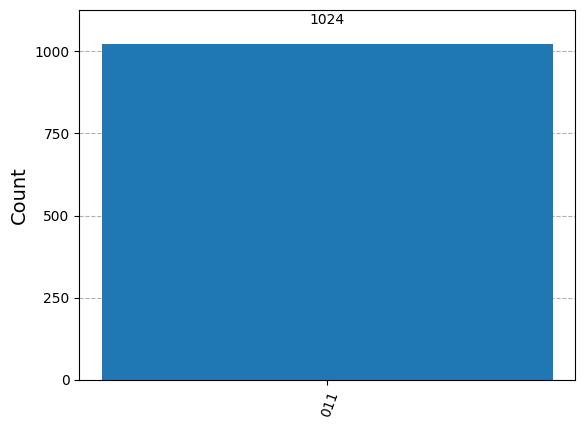

In [25]:
!pip install qiskit_aer

from qiskit import transpile
from qiskit_aer import Aer
# ... (rest of your code)

# Avoid using 'Aer' as a variable name to prevent conflicts
simulator = Aer.get_backend('qasm_simulator')
# Use transpile and backend.run() instead of execute
transpiled_circuit = transpile(circuit, simulator)
result = simulator.run(transpiled_circuit, shots=1024).result()
counts = result.get_counts()
# Import plot_histogram from the correct module
from qiskit.visualization import plot_histogram
plot_histogram(counts)

In [26]:
from qiskit import QuantumCircuit

# Create a circuit with 2 qubits and 2 classical bits
qc = QuantumCircuit(2, 2)

# Apply a Hadamard gate to the first qubit
qc.h(0)

# Apply a CNOT gate with the first qubit as control and the second as target
qc.cx(0, 1)

# Measure the qubits
qc.measure([0, 1], [0, 1])

print(qc.draw())  # Visualize the circuit

     ┌───┐     ┌─┐   
q_0: ┤ H ├──■──┤M├───
     └───┘┌─┴─┐└╥┘┌─┐
q_1: ─────┤ X ├─╫─┤M├
          └───┘ ║ └╥┘
c: 2/═══════════╩══╩═
                0  1 


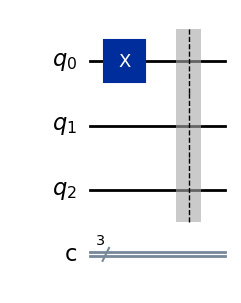

In [27]:
!pip install pylatexenc
import matplotlib.pyplot as plt
from qiskit import *
circuit = QuantumCircuit(3, 3)
circuit.x(0)
circuit.barrier()
%matplotlib inline
circuit.draw(initial_state = True)
circuit.draw(output='mpl') # Now this should work

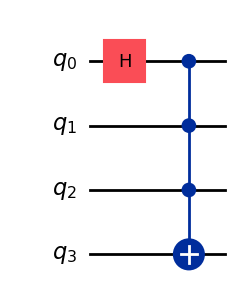

In [28]:
from qiskit import QuantumCircuit
from qiskit.circuit.library import HGate, MCXGate

mcx_gate = MCXGate(3)
hadamard_gate = HGate()

qc = QuantumCircuit(4)
qc.append(hadamard_gate, [0])
qc.append(mcx_gate, [0, 1, 2, 3])
qc.draw("mpl")

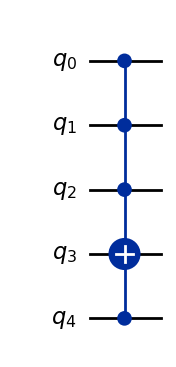

In [29]:
from qiskit.circuit.library import MCXGate
gate = MCXGate(4)

from qiskit import QuantumCircuit
circuit = QuantumCircuit(5)
circuit.append(gate, [0, 1, 4, 2, 3])
circuit.draw('mpl')

In [30]:
from qiskit.circuit.library import get_standard_gate_name_mapping


gate_name_map = get_standard_gate_name_mapping()
cx_object = gate_name_map["cx"]

print(cx_object)
print(type(cx_object))

Instruction(name='cx', num_qubits=2, num_clbits=0, params=[])
<class '_SingletonCXGate'>


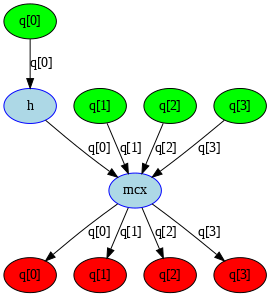

In [31]:
# Convert circuit to dag and display dag
from qiskit.converters import circuit_to_dag # Import circuit_to_dag
from qiskit.visualization import dag_drawer # Import dag_drawer

# Convert circuit to dag and display dag
dag = circuit_to_dag(qc)
display(dag_drawer(dag))


In [32]:
from qiskit.dagcircuit import DAGOpNode # Import DAGOpNode

for node in dag.topological_nodes():
    if isinstance(node, DAGOpNode): # Check if the node is a DAGOpNode
        print(type(node), node.op) # Access the operation (op) if it's a DAGOpNode
    else:
        print(type(node), node.wire) # Access the wire if it's not a DAGOpNode

<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 0)
<class 'qiskit._accelerate.circuit.DAGOpNode'> Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 1)
<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 2)
<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 3)
<class 'qiskit._accelerate.circuit.DAGOpNode'> Instruction(name='mcx', num_qubits=4, num_clbits=0, params=[])
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 0)
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 1)
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 2)
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 3)


In [33]:
from qiskit.dagcircuit import DAGOpNode

for node in dag.topological_nodes():
    if isinstance(node, DAGOpNode):
        print(type(node), node.op)
    else:
        print(type(node), node.wire)


<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 0)
<class 'qiskit._accelerate.circuit.DAGOpNode'> Instruction(name='h', num_qubits=1, num_clbits=0, params=[])
<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 1)
<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 2)
<class 'qiskit._accelerate.circuit.DAGInNode'> Qubit(QuantumRegister(4, 'q'), 3)
<class 'qiskit._accelerate.circuit.DAGOpNode'> Instruction(name='mcx', num_qubits=4, num_clbits=0, params=[])
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 0)
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 1)
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 2)
<class 'qiskit._accelerate.circuit.DAGOutNode'> Qubit(QuantumRegister(4, 'q'), 3)


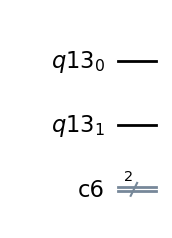

In [34]:
!pip install pylatexenc

from qiskit import *
from pylatexenc import *

qr = QuantumRegister(2)
cr = ClassicalRegister(2)

circuit = QuantumCircuit(qr, cr)

%matplotlib inline

circuit.draw(output='mpl')

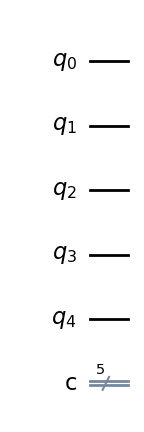

In [35]:
from qiskit import *
from pylatexenc import *

#qr = QuantumRegister(2)
#cr = ClassicalRegister(2)

#circuit = QuantumCircuit(qr, cr)

crr = QuantumCircuit(5,5)
%matplotlib inline

#circuit.draw(output='mpl')
crr.draw(output='mpl')

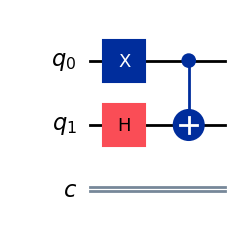

In [36]:
from qiskit.circuit import QuantumCircuit
from qiskit.visualization import dag_drawer
from qiskit.converters import circuit_to_dag

# Create basic Bell circuit

qc = QuantumCircuit(2, 1)
qc.x(0)
qc.h(1)
qc.cx(0, 1)

display(qc.draw('mpl', cregbundle=False))
print(qc._data)

In [37]:
!pip install qiskit-aer

import qiskit as q
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from matplotlib import style
import math
#style.use("dark_background")

from qiskit_aer import Aer # Import Aer from the correct module

# Use qiskit_aer to get the backends
qasm_sim = Aer.get_backend('qasm_simulator')
statevec_sim = Aer.get_backend("statevector_simulator")

In [38]:
import numpy as np
from qiskit import QuantumCircuit

# Create a Quantum Circuit acting on a quantum register of three qubits
circ = QuantumCircuit(3)

# 1. A quantum circuit for preparing the quantum state |000> + i |111>
qc_example = QuantumCircuit(3)
qc_example.h(0)          # generate superpostion
qc_example.p(np.pi/2,0)  # add quantum phase
qc_example.cx(0,1)       # 0th-qubit-Controlled-NOT gate on 1st qubit
qc_example.cx(0,2)       # 0th-qubit-Controlled-NOT gate on 2nd qubit

In [39]:
# Set up six different observables.
from qiskit.quantum_info import SparsePauliOp

observables_labels = ["IZ", "IX", "ZI", "XI", "ZZ", "XX"]
observables = [SparsePauliOp(label) for label in observables_labels]

In [40]:
!pip install qiskit

from qiskit import QuantumCircuit

# Create a 4-qubit circuit
qc = QuantumCircuit(4)

# Apply a Hadamard gate to the first qubit to create superposition
qc.h(0)

# Apply CNOT gates to entangle the qubits
qc.cx(0, 1)
qc.cx(1, 2)
qc.cx(2, 3)

# The circuit now represents the GHZ state: |0000> + |1111>

# You can visualize the circuit:
print(qc.draw())

     ┌───┐               
q_0: ┤ H ├──■────────────
     └───┘┌─┴─┐          
q_1: ─────┤ X ├──■───────
          └───┘┌─┴─┐     
q_2: ──────────┤ X ├──■──
               └───┘┌─┴─┐
q_3: ───────────────┤ X ├
                    └───┘


In [41]:
!pip install qiskit

from qiskit import QuantumCircuit

# Create a 2-qubit circuit
qc = QuantumCircuit(2)

# Apply Hadamard gates to both qubits
qc.h(0)
qc.h(1)

# Create entanglement with a CNOT gate
qc.cx(0, 1)

# The circuit now represents a superposition of all 4 states:
# |00> + |01> + |10> + |11> (with possible phase differences)

# You can visualize the circuit:
print(qc.draw())

     ┌───┐     
q_0: ┤ H ├──■──
     ├───┤┌─┴─┐
q_1: ┤ H ├┤ X ├
     └───┘└───┘


In [42]:
!pip install qiskit
!pip install qiskit-aer

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler # Import Sampler for execution
from qiskit_aer import Aer # Import Aer from qiskit_a
from qiskit import transpile




# Create a quantum circuit with three qubits:
# q0: The qubit to be teleported
# q1: Alice's qubit (part of the entangled pair)
# q2: Bob's qubit (part of the entangled pair)
qr = QuantumRegister(3, name="q")
# Create two classical bits for measurement results:
# cr0: Alice's measurement result
# cr1: Bob's measurement result
cr = ClassicalRegister(2, name="c")
circuit = QuantumCircuit(qr, cr)

# Initialize the qubit to be teleported (q0) to a desired state
# Here, we initialize it to the |1> state using an X gate
circuit.x(qr[0])

# Create an entangled pair (Bell state) between Alice's (q1) and Bob's (q2) qubits
circuit.h(qr[1])
circuit.cx(qr[1], qr[2])

# Apply CNOT gate from q0 (teleported qubit) to q1 (Alice's qubit)
circuit.cx(qr[0], qr[1])

# Apply Hadamard gate to q0
circuit.h(qr[0])

# Measure q0 and q1 and store results in classical bits cr0 and cr1
circuit.measure(qr[0], cr[0])
circuit.measure(qr[1], cr[1])

# Apply gates on Bob's qubit (q2) based on measurement results
circuit.cx(qr[1], qr[2])
circuit.cz(qr[0], qr[2])


# *** Add a measurement for the third qubit (q2) to classical bit 2 if available ***
# If you have more classical bits, add measurements for other qubits accordingly.
# For example, if you have a third classical bit (cr[2]), you can add:
# circuit.measure(qr[2], cr[2])


# Simulate the circuit using qasm_simulator to handle measurements
simulator = Aer.get_backend('qasm_simulator')
# Transpile the circuit for the simulator
transpiled_circuit = transpile(circuit, simulator)

# Execute the transpiled circuit using simulator.run
job = simulator.run(transpiled_circuit, shots=1024)
result = job.result()

# Get the counts from the result
counts = result.get_counts(transpiled_circuit)


# Print the results
print(counts)

{'01': 272, '11': 269, '00': 238, '10': 245}


In [43]:
!pip install qiskit

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister


# Define the number of qubits for each nucleus
num_qubits_nucleus1 = 2  # Example: Set to 2 qubits
num_qubits_nucleus2 = 2  # Example: Set to 2 qubits

# Define the number of classical bits for measurement
num_classical_bits = 2  # Example: Set to 2 classical bits

# Define quantum registers for nuclei
nucleus1 = QuantumRegister(num_qubits_nucleus1, name="nucleus1")
nucleus2 = QuantumRegister(num_qubits_nucleus2, name="nucleus2")

# Define classical register for measurement
cr = ClassicalRegister(num_classical_bits, name="cr")

# Create quantum circuit
circuit = QuantumCircuit(nucleus1, nucleus2, cr)

# Prepare nuclei in superposition
# ... (Apply gates to create desired superposition states)

# Entangle nuclei
# ... (Apply entangling gates, e.g., CNOT)

# Simulate fusion interaction
# ... (Apply gates representing the fusion process)

# Measure outcome
circuit.measure(nucleus1, cr)  # Measure final state of nuclei

# ... (Execute circuit and analyze results)

In [44]:
# prompt: write a quantum code for particle inter communication in hot and cold on dimension

import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit_aer import Aer
from qiskit import transpile

def simulate_particle_interaction(temperature_difference):
    """
    Simulates particle interaction based on a temperature difference.

    Args:
        temperature_difference: A float representing the temperature difference between two systems.

    Returns:
        A QuantumCircuit representing the simulated interaction.
    """
    # Define quantum and classical registers
    qr = QuantumRegister(2, 'particles')  # Two qubits represent two particles
    cr = ClassicalRegister(2, 'measurement')
    qc = QuantumCircuit(qr, cr)

    # Encode temperature difference (a classical value) into a quantum state
    # (Use a suitable mapping to represent the temperature difference as a rotation angle)
    angle = np.pi * (temperature_difference / 100.0)  # Adjust scaling as needed
    qc.ry(angle, qr[0])


    # Simulate interaction (e.g., entanglement and information exchange)
    qc.cx(qr[0], qr[1]) # CNOT gate to entangle the qubits based on temperature

    # Measure the qubits
    qc.measure(qr, cr)

    return qc

# Example usage
temperature_diff = 50.0  # Example temperature difference

# Create and simulate the circuit
circuit = simulate_particle_interaction(temperature_diff)

# Use the Sampler primitive
simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
sampler = Sampler()
job = sampler.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.quasi_dists[0]

print(f"Simulation results for temperature difference {temperature_diff}:")
counts


Simulation results for temperature difference 50.0:


<ipython-input-44-d63d80ac92a5>:47: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


{0: 0.4697265625, 3: 0.5302734375}

In [45]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
from qiskit_aer import Aer
from qiskit import transpile, assemble
from qiskit.quantum_info import Statevector # Import Statevector for state creation

def simulate_9d_teleportation(hot_state, cold_state):
    """Simulates quantum teleportation in a 9-dimensional space.

    Args:
        hot_state: A numpy array representing the initial state of the "hot" particle.
        cold_state: A numpy array representing the initial state of the "cold" particle.

    Returns:
        A QuantumCircuit representing the teleportation process.
    """

    # Note: Direct 9-dimensional quantum simulation is computationally expensive.
    # This simulation uses a simplified model to illustrate the concept.

    # Define quantum registers (adjust based on the complexity of your simulation)
    qr_hot = QuantumRegister(3, 'hot')  # Represent 9-d with 3 qubits
    qr_cold = QuantumRegister(3, 'cold')
    cr = ClassicalRegister(6, 'measurement')
    qc = QuantumCircuit(qr_hot, qr_cold, cr)

    # Encode the states into the quantum registers using Statevector
    # Create valid quantum states for initialization
    hot_state_vec = Statevector.from_label(hot_state)  # Create a Statevector from the label
    cold_state_vec = Statevector.from_label(cold_state)  # Create a Statevector from the label

    qc.initialize(hot_state_vec, qr_hot)  # Initialize hot qubits with the statevector
    qc.initialize(cold_state_vec, qr_cold)  # Initialize cold qubits with the statevector

    # Create entanglement between the hot and cold particle qubits (simplified)
    qc.h(qr_hot[0])
    qc.cx(qr_hot[0], qr_cold[0])

    # Simulate teleportation interaction
    # (This would be a more complex quantum operation in a realistic model)
    for i in range(3):
        qc.cx(qr_hot[i], qr_cold[i])
        qc.h(qr_hot[i])
        qc.measure(qr_hot[i], cr[i])
        qc.measure(qr_cold[i], cr[i + 3])

    return qc

# Example usage
# Example: Use state labels like '001', '100', etc.
hot_initial_state = '010'
cold_initial_state = '100'

circuit = simulate_9d_teleportation(hot_initial_state, cold_initial_state)

simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
sampler = Sampler()
job = sampler.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.quasi_dists[0]
counts

<ipython-input-45-5c205e590f31>:59: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


{48: 0.234375, 50: 0.24609375, 52: 0.2783203125, 54: 0.2412109375}

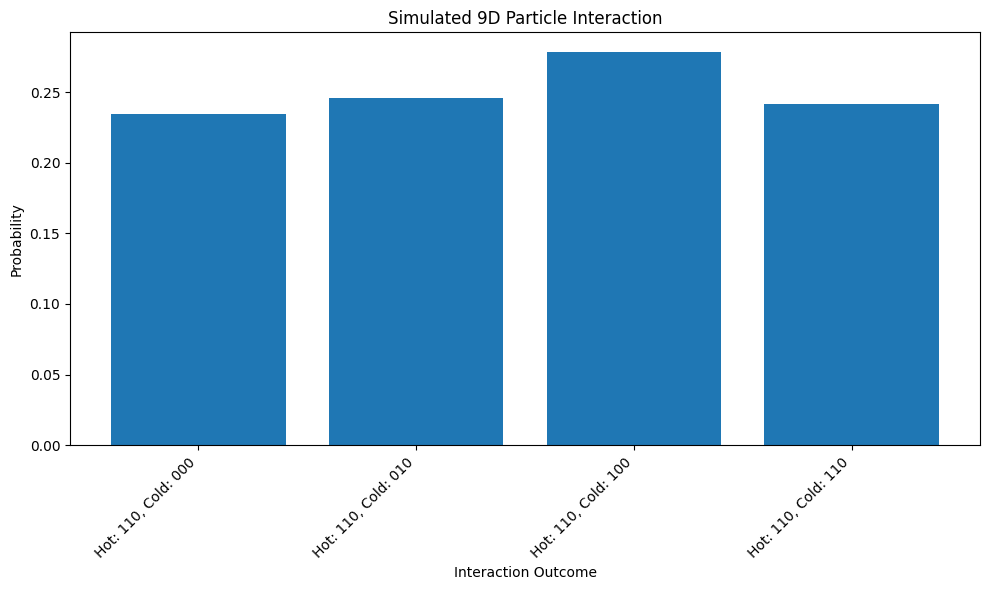

In [46]:
# prompt: write a quantum code for particle inter communication with hot and cold environment on space with 9th dimension in graphical representation

import matplotlib.pyplot as plt

def plot_9d_interaction(counts):
    """Plots the results of the 9D interaction simulation."""

    # Extract relevant data from counts (adapt this to your simulation's output)
    # Example: Assume counts are in the format {'000000': 500, '111111': 524, ...}

    hot_states = []
    cold_states = []
    probabilities = []

    # Get the binary outcomes and probabilities
    # Iterate through items to get both outcome and probability
    for outcome, probability in counts.items():
        outcome_str = bin(outcome)[2:].zfill(6) # Convert to binary and pad with zeros

        hot_states.append(outcome_str[:3])  # Example, assuming first 3 bits represent hot particle
        cold_states.append(outcome_str[3:])  # Example, assuming last 3 bits represent cold particle
        probabilities.append(probability)

    # Plotting code
    plt.figure(figsize=(10, 6))
    plt.bar(range(len(probabilities)), probabilities)

    # Customize the plot as needed (labels, titles, etc.)
    plt.xlabel("Interaction Outcome")
    plt.ylabel("Probability")
    plt.title("Simulated 9D Particle Interaction")
    plt.xticks(range(len(probabilities)), [f"Hot: {hot}, Cold: {cold}" for hot, cold in zip(hot_states, cold_states)], rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


# Example usage (assuming you have 'counts' from your simulation)
plot_9d_interaction(counts)

<ipython-input-47-eb09f54c133d>:54: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Simulation result for n=7 and a=3: {0: 0.5, 1: 0.5}


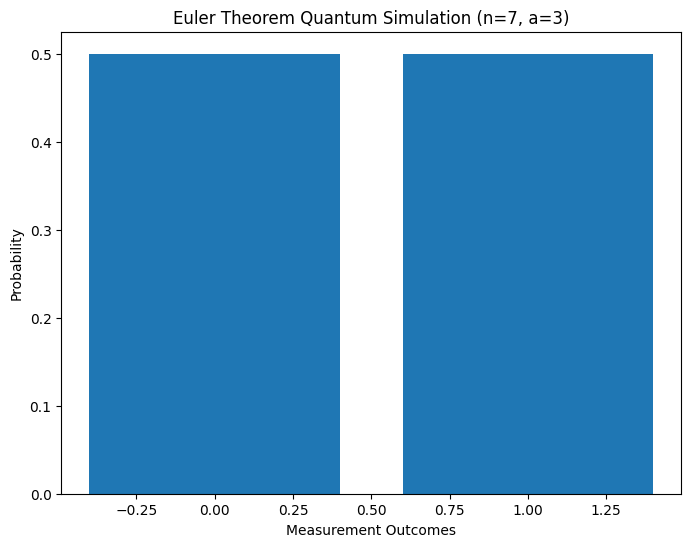

In [47]:

from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
#from qiskit import Aer, transpile  # Remove this incorrect import
from qiskit_aer import Aer # Import Aer from the correct module: qiskit_aer
from qiskit import transpile # transpile is in qiskit, not qiskit_aer
import numpy as np
import matplotlib.pyplot as plt


def simulate_euler_theorem_quantum(n, a):
    """Simulates Euler's totient theorem using quantum computation.

    Args:
        n: An integer representing the modulus.
        a: An integer coprime to n.

    Returns:
        A QuantumCircuit representing the simulation.
    """
    # Note: This is a simplified representation. A true quantum algorithm for this
    # would likely require more advanced techniques.
    num_qubits = 2  # Adjust based on the size of n
    qr = QuantumRegister(num_qubits, 'qubits')
    cr = ClassicalRegister(num_qubits, 'bits')
    qc = QuantumCircuit(qr, cr)

    # Encode n and a into the quantum state (this requires a suitable mapping)
    # Placeholder for the encoding
    # ... quantum encoding logic (complex, depends on the algorithm) ...
    qc.h(0)
    qc.cx(0, 1)

    # Simulate the exponentiation modulo n using quantum gates
    # Placeholder for exponentiation simulation
    # ... quantum exponentiation (complex, depends on the algorithm) ...
    for _ in range(a):
        qc.cx(0,1)

    # Measure the qubits
    qc.measure(qr, cr)

    return qc

# Example usage
n = 7  # Example modulus
a = 3  # Example coprime integer


circuit = simulate_euler_theorem_quantum(n, a)

simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)

sampler = Sampler()
job = sampler.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.quasi_dists[0]

print(f"Simulation result for n={n} and a={a}: {counts}")

def plot_euler_results(counts):
    """Plots the Euler theorem simulation results."""

    plt.figure(figsize=(8, 6))
    plt.bar(counts.keys(), counts.values())
    plt.xlabel("Measurement Outcomes")
    plt.ylabel("Probability")
    plt.title(f"Euler Theorem Quantum Simulation (n={n}, a={a})")
    plt.show()

plot_euler_results(counts)

<ipython-input-48-8e31911b7824>:56: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


Grover's algorithm results for target state '10': {0: 0.2529296875, 1: 0.2626953125, 2: 0.265625, 3: 0.21875}


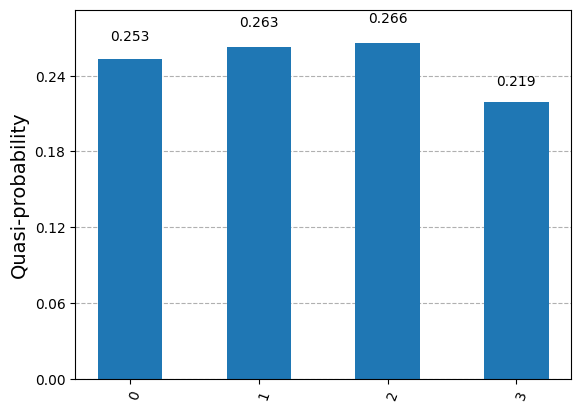

In [48]:
# prompt: write a quantum code with basic groovr algorithms

from qiskit import QuantumCircuit, transpile  # Keep QuantumCircuit and execute
from qiskit_aer import Aer # Import Aer from the correct module: qiskit_aer

#from qiskit import QuantumCircuit, Aer, transpile
from qiskit.visualization import plot_histogram
from qiskit.primitives import Sampler
import numpy as np

# Grover's algorithm for a 2-qubit search space
def grover_algorithm_2qubits(target_state):
    """
    Implements Grover's algorithm for a 2-qubit search space.

    Args:
        target_state: The target state to search for (e.g., '01').

    Returns:
        A QuantumCircuit representing Grover's algorithm.
    """

    qc = QuantumCircuit(2, 2)

    # Step 1: Initialize qubits to superposition
    qc.h([0, 1])

    # Step 2: Oracle (Marks the target state)
    if target_state == '01':
        qc.z(1)  # Example: Oracle for |01>
    elif target_state == '10':
        qc.z(0)
    elif target_state == '11':
        qc.z(0)
        qc.z(1)
        qc.cz(0,1)
    # Add more 'elif' for other possible target states


    # Step 3: Diffusion Operator
    qc.h([0, 1])
    qc.z([0, 1])
    qc.cz(0, 1)
    qc.h([0, 1])

    # Measure the qubits
    qc.measure([0, 1], [0, 1])
    return qc

# Example usage:
target_state = '10'  # Change this to the desired target state
circuit = grover_algorithm_2qubits(target_state)

simulator = Aer.get_backend('qasm_simulator')
transpiled_circuit = transpile(circuit, simulator)
sampler = Sampler()
job = sampler.run(transpiled_circuit, shots=1024)
result = job.result()
counts = result.quasi_dists[0]
print(f"Grover's algorithm results for target state '{target_state}': {counts}")

plot_histogram(counts)


In [49]:
#from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer
#import math


from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler
#from qiskit import Aer, transpile  # Remove this incorrect import
from qiskit_aer import Aer # Import Aer from the correct module: qiskit_aer
from qiskit import transpile # transpile is in qiskit, not qiskit_aer
import matplotlib.pyplot as plt
import math


# from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, execute, Aer  # Incorrect import
#from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, Aer # Correct import for QuantumCircuit, QuantumRegister, ClassicalRegister, Aer
#from qiskit.primitives import Sampler, Estimator # Correct import for execute
#import math



def qft_dagger(qc, q, n):
    """n-qubit QFTdagger the first n qubits in qc"""
    for qubit in range(n//2):
        qc.swap(q[qubit], q[n-qubit-1])
    for j in range(n):
        for m in range(j):
            qc.cp(-math.pi/float(2**(j-m)), q[m], q[j])
        qc.h(q[j])

def shor_circuit(N, a):
    # Number of qubits needed for the number representation
    n = math.ceil(math.log2(N))

    # Quantum registers for input, output, and ancilla
    qreg1 = QuantumRegister(n)  # for x
    qreg2 = QuantumRegister(n)  # for f(x) = a^x mod N
    creg = ClassicalRegister(n)

    circuit = QuantumCircuit(qreg1, qreg2, creg)

    # Apply Hadamard gates to all qubits in qreg1
    circuit.h(qreg1)

    # Modular exponentiation - this is a placeholder for actual modular exponentiation
    for i in range(n):
        for j in range(2**i):
            circuit.x(qreg1[i])
            # Here you would implement the modular exponentiation logic
            circuit.x(qreg1[i])

    # Apply inverse QFT on qreg1
    qft_dagger(circuit, qreg1, n)

    # Measure
    circuit.measure(qreg1, creg)

    return circuit

# Example with N=15, a=2 (you'd need to implement the actual modular exponentiation for this to work)
N = 15
a = 2
circuit = shor_circuit(N, a)

# Simulate the circuit
#simulator = Aer.get_backend('qasm_simulator')
#job = execute(circuit, simulator, shots=1000)
#result = job.result()
#counts = result.get_counts(circuit)


sampler = Sampler() # Initialize the Sampler
job = sampler.run(circuit, shots=1000) # Run the circuit using Sampler
result = job.result() # Get the result
counts = result.quasi_dists[0] # Access quasi-distributions for counts


print(counts)




{0: 1.0}


<ipython-input-49-1b1c7265cbfa>:71: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler() # Initialize the Sampler


In [50]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit.primitives import Sampler # Import Sampler for execution
from qiskit_aer import Aer # Import Aer from the correct module: qiskit_aer
from qiskit import transpile # transpile is in qiskit, not qiskit_aer
import numpy as np
#import matplotlib.pyplot as plt # Not used in this code snippet

# Example: Entanglement for a simple quantum communication (conceptual)

# Create a quantum circuit with two qubits
qr = QuantumRegister(2, 'q')
cr = ClassicalRegister(2, 'c')
circuit = QuantumCircuit(qr, cr)

# Entangle the two qubits
circuit.h(qr[0])  # Create superposition on the first qubit
circuit.cx(qr[0], qr[1])  # CNOT to entangle

# Simple calculation of space-time dilation (highly simplified and conceptual)
# Imagine we're using quantum states to represent coordinates or time in different frames

# Define a simple function to represent time dilation (gross simplification)
def time_dilation(v, t):
    gamma = 1 / np.sqrt(1 - v**2)  # v is velocity as fraction of light speed
    return gamma * t

# Here, we're not actually performing the calculation but setting up qubits to represent variables
# For example, we could use one qubit to represent whether we're in a high or low gravity environment
circuit.x(qr[0])  # Set qubit to |1> to represent high gravity

# Measure the qubits
circuit.measure(qr, cr)

# Run the simulation
backend = Aer.get_backend('qasm_simulator')

# Use Sampler to execute the circuit
sampler = Sampler()
job = sampler.run(circuit, shots=1000)
result = job.result()

# Get the quasi-distribution, which acts like counts in this case
quasi_dist = result.quasi_dists[0]

# Print the quasi-distribution (similar to counts)
print(quasi_dist)

# Conceptual post-processing: This would be where you'd interpret quantum results in terms of space-time
# For instance:
# - If qr[0] is |1>, we might interpret this as "high gravity", affecting time dilation calculation
# - If qr[1] represents a velocity, we could decide based on its measurement

# Example of how we might use quantum results for a classical calculation
# Instead of get_counts, access the quasi-distribution to check for state '11'
if 3 in quasi_dist and quasi_dist[3] > 0:  # Check if state '11' (represented by integer 3) has a non-zero probability
    v = 0.8  # 80% speed of light, for example
    t = 1  # 1 second in the moving frame
    print(f"Time dilation factor: {time_dilation(v, t)}")
else:
    print("No significant time dilation detected.")

{1: 0.501, 2: 0.499}
No significant time dilation detected.


<ipython-input-50-6a8557f4a7d4>:38: DeprecationWarning: The class ``qiskit.primitives.sampler.Sampler`` is deprecated as of qiskit 1.2. It will be removed no earlier than 3 months after the release date. All implementations of the `BaseSamplerV1` interface have been deprecated in favor of their V2 counterparts. The V2 alternative for the `Sampler` class is `StatevectorSampler`.
  sampler = Sampler()


In [53]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Define quantum and classical registers
num_qubits = 3
qr = QuantumRegister(num_qubits)
cr = ClassicalRegister(num_qubits)

# Create a quantum circuit
circuit = QuantumCircuit(qr, cr)

# Apply quantum gates
circuit.h(qr[0])  # Hadamard on qubit 0
circuit.cx(qr[0], qr[1])  # CNOT with control qubit 0 and target qubit 1
circuit.cx(qr[1], qr[2])  # Entangle qubit 2 with qubit 1

# Measure qubits
circuit.measure(qr, cr)

# Use Aer's AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Plot the results as a histogram
plot_histogram(result.get_counts(compiled_circuit))

# Print the counts in text format
print(result.get_counts(compiled_circuit))

{'000': 488, '111': 512}


In [54]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Define quantum and classical registers
# Alice's qubit, Bell pair qubits, and classical bits for communication
qr = QuantumRegister(3, 'q')  # q0: Alice's qubit, q1: Bell pair qubit for Alice, q2: Bell pair qubit for Bob
cr = ClassicalRegister(2, 'c')  # Classical bits for measurement results

# Create quantum circuit for teleportation
teleportation_circuit = QuantumCircuit(qr, cr)

# Prepare Alice's qubit in some state (for example, superposition)
teleportation_circuit.h(qr[0])  # Apply Hadamard to put q0 in superposition
teleportation_circuit.ry(0.5, qr[0])  # Apply rotation for a more complex state

# Create Bell pair between Alice (q1) and Bob (q2)
teleportation_circuit.h(qr[1])
teleportation_circuit.cx(qr[1], qr[2])

# Alice's operations:
teleportation_circuit.cx(qr[0], qr[1])  # CNOT with Alice's qubit and her part of Bell pair
teleportation_circuit.h(qr[0])  # Hadamard on Alice's qubit

# Measure Alice's qubits and store results in classical bits
teleportation_circuit.measure(qr[0], cr[0])
teleportation_circuit.measure(qr[1], cr[1])

# Bob's conditional operations based on Alice's measurements:
teleportation_circuit.x(qr[2]).c_if(cr[1], 1)  # Apply X if cr[1] is 1
teleportation_circuit.z(qr[2]).c_if(cr[0], 1)  # Apply Z if cr[0] is 1

# Use Aer's AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(teleportation_circuit, simulator)

# Execute the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Plot the results as a histogram
plot_histogram(result.get_counts(compiled_circuit))

# Print the counts in text format
print(result.get_counts(compiled_circuit))

{'01': 231, '11': 234, '10': 286, '00': 249}


<ipython-input-54-44f7cacf674b>:30: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  teleportation_circuit.x(qr[2]).c_if(cr[1], 1)  # Apply X if cr[1] is 1
<ipython-input-54-44f7cacf674b>:31: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  teleportation_circuit.z(qr[2]).c_if(cr[0], 1)  # Apply Z if cr[0] is 1


In [55]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Define quantum and classical registers
# Here, we're imagining two "receivers" (Bob and Charlie) billions of light-years away
qr = QuantumRegister(3, 'q')  # q0: Alice's qubit, q1: Bob's qubit, q2: Charlie's qubit
cr = ClassicalRegister(4, 'c')  # 2 bits for each receiver

# Create quantum circuit for "parallel universe" teleportation
parallel_universe_circuit = QuantumCircuit(qr, cr)

# Prepare Alice's qubit in some state
parallel_universe_circuit.h(qr[0])  # Apply Hadamard for superposition
parallel_universe_circuit.ry(0.5, qr[0])  # Apply rotation for a more complex state

# Create Bell pairs for both Bob and Charlie
for i in [1, 2]:  # Bob's and Charlie's qubits
    parallel_universe_circuit.h(qr[0])
    parallel_universe_circuit.cx(qr[0], qr[i])
    parallel_universe_circuit.reset(qr[0])  # Reset Alice's qubit for next entanglement

# Alice's operations for teleportation (to both Bob and Charlie)
parallel_universe_circuit.h(qr[0])
parallel_universe_circuit.cx(qr[0], qr[1])
parallel_universe_circuit.cx(qr[0], qr[2])

# Measure Alice's qubit and both entangled qubits
parallel_universe_circuit.measure(qr[0], cr[0])  # Alice's measurement
parallel_universe_circuit.measure(qr[1], cr[1])  # Bob's measurement
parallel_universe_circuit.measure(qr[2], cr[3])  # Charlie's measurement

# Conditional operations for Bob and Charlie (simplified for demonstration)
for i, c in zip([1, 2], [1, 3]):  # Bob and Charlie
    parallel_universe_circuit.x(qr[i]).c_if(cr[c], 1)
    parallel_universe_circuit.z(qr[i]).c_if(cr[0], 1)

# Use Aer's AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(parallel_universe_circuit, simulator)

# Execute the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Plot the results as a histogram
plot_histogram(result.get_counts(compiled_circuit))

# Print the counts in text format
print(result.get_counts(compiled_circuit))

<ipython-input-55-44b4b1439806>:36: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  parallel_universe_circuit.x(qr[i]).c_if(cr[c], 1)
<ipython-input-55-44b4b1439806>:37: DeprecationWarning: The method ``qiskit.circuit.instructionset.InstructionSet.c_if()`` is deprecated as of qiskit 1.3.0. It will be removed in 2.0.0.
  parallel_universe_circuit.z(qr[i]).c_if(cr[0], 1)


{'0001': 15, '1010': 20, '0010': 13, '0000': 259, '0011': 226, '1011': 232, '1001': 13, '1000': 222}


In [56]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Let's imagine we're dealing with quantum states that might represent "entities" or "phenomena"
qr = QuantumRegister(5, 'q')  # q0: Our qubit; q1, q2: Alien/Supernatural qubits; q3, q4: Parallel universe qubits
cr = ClassicalRegister(5, 'c')  # Classical bits to "interpret" results

# Quantum circuit for an imaginative "interaction"
parallel_supernatural_circuit = QuantumCircuit(qr, cr)

# Prepare our qubit in a state (could be thought of as "our signal")
parallel_supernatural_circuit.h(qr[0])  # Superposition
parallel_supernatural_circuit.ry(np.pi/4, qr[0])  # Apply some rotation

# Create entanglement with "Alien/Supernatural" qubits
parallel_supernatural_circuit.cx(qr[0], qr[1])  # Entangle with "Alien"
parallel_supernatural_circuit.cx(qr[0], qr[2])  # Entangle with "Supernatural"

# Now, imagine we're trying to interact or "communicate" with parallel universes
for i in [3, 4]:  # Creating entanglement with "parallel universes"
    parallel_supernatural_circuit.h(qr[0])
    parallel_supernatural_circuit.cx(qr[0], qr[i])
    parallel_supernatural_circuit.reset(qr[0])  # Reset for next entanglement

# Simulate some interaction or "response"
# Here, we're just applying some arbitrary gates to mimic "other influences"
parallel_supernatural_circuit.cx(qr[1], qr[3])  # Alien influences universe 1
parallel_supernatural_circuit.cx(qr[2], qr[4])  # Supernatural influences universe 2

# Measure all qubits to "read" the "outcome" or "response"
for i in range(5):
    parallel_supernatural_circuit.measure(qr[i], cr[i])

# Simulate this interaction
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(parallel_supernatural_circuit, simulator)

# Execute the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Plot the results as a histogram
plot_histogram(result.get_counts(compiled_circuit))

# Print the counts in text format
print(result.get_counts(compiled_circuit))

{'00000': 33, '10000': 35, '11000': 35, '10110': 203, '01110': 224, '01000': 48, '11110': 211, '00110': 211}


In [58]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Create a Quantum Register with 2 qubits
qr = QuantumRegister(2)

# Create a Classical Register with 2 bits
cr = ClassicalRegister(2)

# Create a Quantum Circuit
circuit = QuantumCircuit(qr, cr)

# Apply a Hadamard gate to the first qubit to put it in superposition
circuit.h(qr[0])

# Apply a CNOT (Controlled-NOT) gate where the first qubit is control and the second is target
circuit.cx(qr[0], qr[1])

# Measure the qubits
circuit.measure(qr, cr)

# Use Aer's AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Returns counts
counts = result.get_counts(compiled_circuit)

# Plot a histogram
plot_histogram(counts)

# Print the outcomes
print("\nTotal count for 00 and 11:", counts.get('00', 0) + counts.get('11', 0))
print("Total count for 01 and 10:", counts.get('01', 0) + counts.get('10', 0))


Total count for 00 and 11: 1000
Total count for 01 and 10: 0


In [61]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram

# Define quantum and classical registers for two particles
qr = QuantumRegister(2, 'particle')
cr = ClassicalRegister(2, 'result')

# Create a quantum circuit
circuit = QuantumCircuit(qr, cr)

# Entangle the particles:
# 1. Put the first particle in superposition
circuit.h(qr[0])

# 2. Use CNOT to entangle the particles
circuit.cx(qr[0], qr[1])

# Measure both particles
circuit.measure(qr, cr)

# Use AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit with 1000 shots
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Retrieve counts
counts = result.get_counts(compiled_circuit)

# Plot the histogram of results
plot_histogram(counts)

# Print the outcomes
print("\nTotal count for 00 and 11:", counts.get('00', 0) + counts.get('11', 0))
print("Total count for 01 and 10:", counts.get('01', 0) + counts.get('10', 0))


Total count for 00 and 11: 1000
Total count for 01 and 10: 0


Quantum CAPTCHA: 10111


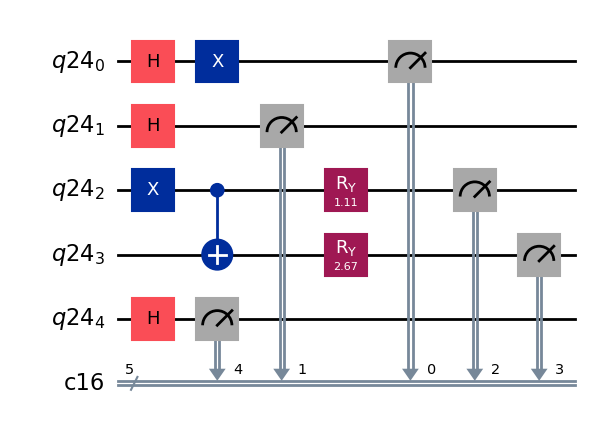

In [68]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import random

# Define quantum and classical registers
qr = QuantumRegister(5)  # 5 qubits for complexity
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr, cr)

# Apply random quantum gates to create a unique quantum state
for qubit in range(5):
    if random.choice([True, False]):
        circuit.h(qr[qubit])  # Hadamard for superposition
    if random.choice([True, False]):
        circuit.x(qr[qubit])  # X gate for bit flip
    if random.choice([True, False]) and qubit < 4:
        circuit.cx(qr[qubit], qr[qubit+1])  # CNOT for entanglement
    if random.choice([True, False]):
        circuit.ry(random.uniform(0, 2*np.pi), qr[qubit])  # Random rotation around Y axis

# Measure all qubits to get a classical bit string (our CAPTCHA)
circuit.measure(qr, cr)

# Use AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator
job = simulator.run(compiled_circuit, shots=1)  # One shot to get one unique outcome

# Get the result
result = job.result()
captcha = list(result.get_counts(compiled_circuit).keys())[0]  # Since shots=1, we'll get one result

# Print the CAPTCHA
print(f"Quantum CAPTCHA: {captcha}")

# Optionally, visualize the circuit
circuit.draw(output='mpl')

# For verification, you would need:
# 1. To reconstruct the circuit based on the CAPTCHA string, or
# 2. Develop a classical algorithm to recognize the pattern with high accuracy


In [79]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import random
import string

def quantum_shuffle_password(password, num_qubits=5):
    # Convert password to list of characters for manipulation
    pwd_list = list(password)

    # Quantum registers for randomness generation
    qr = QuantumRegister(num_qubits)
    cr = ClassicalRegister(num_qubits)
    circuit = QuantumCircuit(qr, cr)

    # Apply random quantum gates to create a quantum state
    for qubit in range(num_qubits):
        circuit.h(qr[qubit])  # Hadamard for superposition
        if random.choice([True, False]):
            circuit.x(qr[qubit])  # Bit flip for added randomness

    # Measure to collapse the state into a classical bit string
    circuit.measure(qr, cr)

    # Use qasm_simulator to get the result
    simulator = AerSimulator()
    compiled_circuit = transpile(circuit, simulator)
    job = simulator.run(compiled_circuit, shots=1)
    result = job.result()
    random_bits = list(result.get_counts(compiled_circuit).keys())[0]

    # Convert binary string to positions for shuffling
    positions = [int(bit) for bit in random_bits]

    # Shuffle password based on quantum randomness
    aligned_pwd = []
    for bit in positions:
        if len(pwd_list) > 0:  # To avoid index errors if password is shorter than num_qubits
            aligned_pwd.append(pwd_list.pop(bit % len(pwd_list)))

    # Append remaining characters if any
    aligned_pwd.extend(pwd_list)

    return ''.join(aligned_pwd)

# Example usage
original_password = "AjitKumar"
quantum_aligned_password = quantum_shuffle_password(original_password)
print(f"Original Password: {original_password}")
print(f"Quantum Aligned Password: {quantum_aligned_password}")

Original Password: AjitKumar
Quantum Aligned Password: jitKuAmar


In [7]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Let's assume we're looking at a simplified 2D space for potential planet locations
# We'll use quantum states to represent different areas in this space

# Define quantum registers
qr = QuantumRegister(2)  # 2 qubits for 4 potential "locations" in our simplified model
cr = ClassicalRegister(2)
circuit = QuantumCircuit(qr, cr)

# Apply Hadamard gates to create superposition across all possibilities
circuit.h(qr[0])
circuit.h(qr[1])

# We could simulate gravitational influences or other factors by adding phase gates or controlled operations
# Here, let's apply some arbitrary phase gates to mimic gravitational perturbations
for i in range(2):
    circuit.p(np.pi/4, qr[i])  # Phase shift to represent some influence

# Measurement to collapse our quantum state into a classical result
circuit.measure(qr, cr)

# Use AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator with multiple shots to see probability distribution
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Retrieve counts to see where our "planet" might be found more often
counts = result.get_counts(compiled_circuit)

# Visualize results
plot_histogram(counts)

# Print the probability distribution
for key, value in counts.items():
    probability = value / 1000
    print(f"Probability of planet at location {key}: {probability:.4f}")


Probability of planet at location 01: 0.2430
Probability of planet at location 10: 0.2480
Probability of planet at location 00: 0.2730
Probability of planet at location 11: 0.2360


In [8]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Suppose we're looking at a galaxy with a simplified 4-dimensional parameter space:
# e.g., distance, velocity, brightness, and orbital inclination

# Define quantum registers - 4 qubits for 4 parameters
qr = QuantumRegister(4)
cr = ClassicalRegister(4)
circuit = QuantumCircuit(qr, cr)

# Put all qubits into superposition to represent all possible combinations of parameters
for qubit in range(4):
    circuit.h(qr[qubit])

# Let's apply some quantum gates to mimic how certain parameters might "interact":
# Here, we're using CNOT gates to represent correlations between parameters
circuit.cx(qr[0], qr[1])  # Correlation between distance and velocity
circuit.cx(qr[2], qr[3])  # Correlation between brightness and inclination

# Add some phase gates to represent the influence of known astronomical phenomena
for qubit in range(4):
    circuit.p(np.pi/4, qr[qubit])  # Arbitrary phase shift for simplicity

# Measure to see which parameter combinations are more likely to host planets
circuit.measure(qr, cr)

# Use AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator with multiple shots to get a probability distribution
job = simulator.run(compiled_circuit, shots=10000)

# Get the results
result = job.result()

# Retrieve counts, which represent our probability distribution
counts = result.get_counts(compiled_circuit)

# Visualize results
plot_histogram(counts)

# Print the probability distribution
for key, value in counts.items():
    probability = value / 10000
    print(f"Probability for parameter set {key}: {probability:.4f}")


Probability for parameter set 1010: 0.0685
Probability for parameter set 0001: 0.0595
Probability for parameter set 1100: 0.0619
Probability for parameter set 1000: 0.0637
Probability for parameter set 0110: 0.0609
Probability for parameter set 1101: 0.0649
Probability for parameter set 1011: 0.0683
Probability for parameter set 0011: 0.0641
Probability for parameter set 0111: 0.0589
Probability for parameter set 1111: 0.0595
Probability for parameter set 0100: 0.0643
Probability for parameter set 0000: 0.0621
Probability for parameter set 0010: 0.0591
Probability for parameter set 1001: 0.0629
Probability for parameter set 0101: 0.0611
Probability for parameter set 1110: 0.0603


In [11]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
from qiskit.visualization import plot_histogram
import numpy as np

# Parameters for our galaxy:
# - 0: Proximity to galactic center (0 for close, 1 for far)
# - 1: Brightness (0 for dim, 1 for bright)
# - 2: In habitable zone (0 for no, 1 for yes)

qr = QuantumRegister(3)  # 3 qubits for our 3 parameters
cr = ClassicalRegister(3)
circuit = QuantumCircuit(qr, cr)

# Superposition for all parameters to explore all combinations
for qubit in range(3):
    circuit.h(qr[qubit])

# Let's add some simple interactions:
# - If a planet is far from the galactic center, it might be less bright
#circuit.ccx(qr[0], qr[1], qr[1])  # If far (qr[0]=1) then flip brightness (qr[1])

# Simulate the probability that a planet is in the habitable zone based on other parameters:
# - If a planet is far and bright, it's less likely to be in the habitable zone
circuit.ccx(qr[0], qr[1], qr[2])  # If far and bright, make habitable zone unlikely

# Measure to collapse our quantum state into observable probabilities
circuit.measure(qr, cr)

# Use AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator with multiple shots for probability distribution
job = simulator.run(compiled_circuit, shots=10000)

# Get the results
result = job.result()

# Retrieve counts, which represent our probability distribution for planet parameters
counts = result.get_counts(compiled_circuit)

# Visualize results
plot_histogram(counts)

# Print the probability distribution for each parameter set
print("Probability distribution for planet parameters:")
for key, value in counts.items():
    probability = value / 10000
    print(f"Parameter set {key}: {probability:.4f}")

# Example interpretation:
# If '011' has a higher probability, it means planets that are close to the galactic center,
# bright, and in the habitable zone are more likely according to our model.

Probability distribution for planet parameters:
Parameter set 111: 0.1243
Parameter set 011: 0.1217
Parameter set 101: 0.1177
Parameter set 001: 0.1263
Parameter set 010: 0.1275
Parameter set 000: 0.1269
Parameter set 100: 0.1276
Parameter set 110: 0.1280


In [12]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np

# Let's set up a scenario with 3 "invisible" objects, each represented by a qubit
num_objects = 3
qr = QuantumRegister(2 * num_objects)  # One qubit for each photon pair per object
cr = ClassicalRegister(num_objects)
circuit = QuantumCircuit(qr, cr)

# Create entangled photon pairs for each object
for i in range(0, 2 * num_objects, 2):
    circuit.h(qr[i])  # Hadamard on one photon
    circuit.cx(qr[i], qr[i+1])  # CNOT to entangle

# Simulate interaction with the "invisible" objects:
# - If an object reflects (is visible), it might change the state of one photon in the pair
for i in range(0, 2 * num_objects, 2):
    # Here, we're assuming a 50% chance of interaction for simplicity
    if np.random.random() > 0.5:  # Simulate object interaction
        circuit.x(qr[i])  # Flip the state of the first photon in pair

# Measure the second photon of each pair, which should theoretically give us info about the object
for i in range(1, 2 * num_objects, 2):
    circuit.measure(qr[i], cr[i // 2])

# Use AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator with multiple shots for probability distribution
job = simulator.run(compiled_circuit, shots=1000)

# Get the results
result = job.result()

# Retrieve counts, which represent our "visibility" detection
counts = result.get_counts(compiled_circuit)

# Print the results - each bit string represents which "objects" were "detected"
print("Detected Objects (1 means detected, 0 means not detected):")
for key, value in counts.items():
    prob = value / 1000
    print(f"Detection pattern {key}: Probability {prob:.4f}")

Detected Objects (1 means detected, 0 means not detected):
Detection pattern 100: Probability 0.1240
Detection pattern 001: Probability 0.1120
Detection pattern 011: Probability 0.1280
Detection pattern 111: Probability 0.1310
Detection pattern 110: Probability 0.1120
Detection pattern 101: Probability 0.1390
Detection pattern 000: Probability 0.1200
Detection pattern 010: Probability 0.1340


In [13]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister, transpile
from qiskit_aer import AerSimulator
import numpy as np

# Let's use 3 qubits to represent 3 particles in a simplified quantum field
num_particles = 3
qr = QuantumRegister(num_particles)
cr = ClassicalRegister(num_particles)
circuit = QuantumCircuit(qr, cr)

# Initialize particles in superposition to represent uncertainty in position or state
for i in range(num_particles):
    circuit.h(qr[i])

# Simulate particle interactions or field effects:
# - Here, we're using CNOT gates to represent how one particle's state might influence another,
#   which can be seen as an analogy for gravitational or dark matter interactions
for i in range(num_particles - 1):
    circuit.cx(qr[i], qr[i + 1])  # Particle interaction or field coupling

# Add some phase gates to mimic the influence of a black hole or dark matter's gravitational effects
for i in range(num_particles):
    circuit.p(np.pi/4, qr[i])  # Arbitrary phase shift

# Measurement to observe the "state" of our particles or field
circuit.measure(qr, cr)

# Use AerSimulator for simulation
simulator = AerSimulator()

# Compile the circuit for the simulator
compiled_circuit = transpile(circuit, simulator)

# Execute the circuit on the simulator with multiple shots to see probability distribution
job = simulator.run(compiled_circuit, shots=10000)

# Get the results
result = job.result()

# Retrieve counts to interpret as particle states or field configurations
counts = result.get_counts(compiled_circuit)

# Print results
print("Particle/Field State Probabilities:")
for key, value in counts.items():
    prob = value / 10000
    print(f"State {key}: Probability {prob:.4f}")

Particle/Field State Probabilities:
State 001: Probability 0.1233
State 101: Probability 0.1234
State 011: Probability 0.1265
State 111: Probability 0.1214
State 100: Probability 0.1345
State 010: Probability 0.1263
State 000: Probability 0.1224
State 110: Probability 0.1222
